In [1]:
import numpy as np
from scipy import signal, fft
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
fig_set = {
    "axes.linewidth": .5,
    "axes.labelsize": 10,
    "axes.labelpad": 4.0,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "xtick.major.size": 4,
    "ytick.major.size": 4,
    "xtick.minor.size": 2,
    "xtick.minor.width" : 0.5,
    "ytick.minor.size": 3,
    "ytick.minor.width" : 0.5,
    "xtick.minor.visible" : True,
    "ytick.minor.visible" : True,
    "font.size": 10,
    "xtick.direction": 'out', 
    "ytick.direction": 'out' 
}

plt.rcParams.update(fig_set)

In [3]:
data = np.loadtxt("../lin_dipole/data/Fld/rmhdfs_r0.1.slab_linear.run07D4_j-phi.g0000.idn.001")

In [4]:
### Reshape data -> x, dns ###
dt  = 1.0
nnx = 1280
nx  = 1 + 2*nnx
nt  = int(data.shape[0]/nx)
x   = data[0:nx,0]
xx  = 90-np.arcsin(np.sqrt(x))*180/np.pi
t   = dt * np.arange(nt)
dns = (data[:,1]+1j*data[:,2]).reshape(nt,nx)
dx  = x[1]-x[0]

In [5]:
dns_tk = fft.fft(dns, axis=-1) / nx 
kx=fft.fftfreq(nx, dx/(2.0*np.pi))

twindow=800.0
dt=t[1]-t[0] 
nwindow = int(twindow/dt)
freq,time,dns_wxt = signal.stft(dns_tk[:,:], fs=1.0/dt, window=signal.get_window(('hann'),nwindow),
                                    nperseg=nwindow, noverlap=nwindow/2, return_onesided=False, boundary=None, axis=0) 

omega = -2*np.pi*freq 
kx_shift = fft.fftshift(kx)
omega_shift = fft.fftshift(omega)
dns_wxt_shift = fft.fftshift(dns_wxt, axes=(0,1))

In [6]:
x=data[0:nx,0]
xc = np.arcsin(np.sqrt(x))*180/np.pi
xx = 90 - xc

whann=signal.get_window(("hann"),800)
wdns = whann.reshape(len(whann),1)*dns[0:len(whann)]
xx0 = np.sum(xx.reshape(1,len(xx))*np.abs(wdns)**2)/np.sum(np.abs(wdns)**2)
theta0 = (90-xx0)*np.pi/180
h1_1 = 1/np.sin(theta0)/np.sqrt(1+3*(np.cos(theta0))**2)

In [7]:
whann=signal.get_window(("hann"),800)
t1=400
t2=1200
wdns = whann.reshape(len(whann),1)*dns[t1:t2]
xx0 = np.sum(xx.reshape(1,len(xx))*np.abs(wdns)**2)/np.sum(np.abs(wdns)**2)
theta0 = (90-xx0)*np.pi/180
h1_2 = 1/np.sin(theta0)/np.sqrt(1+3*(np.cos(theta0))**2)

In [8]:
whann=signal.get_window(("hann"),800)
t1=800
t2=1600
wdns = whann.reshape(len(whann),1)*dns[t1:t2]
xx0 = np.sum(xx.reshape(1,len(xx))*np.abs(wdns)**2)/np.sum(np.abs(wdns)**2)
theta0 = (90-xx0)*np.pi/180
h1_3 = 1/np.sin(theta0)/np.sqrt(1+3*(np.cos(theta0))**2)

In [9]:
ni = 499
ds981 = np.loadtxt("../lin_dipole/disp_dipole/l981_lat2092.d")
dsk981 = ds981[:ni,2]
dsfr981 = ds981[:ni,4]

ds916 = np.loadtxt("../lin_dipole/disp_dipole/l916_lat2161.d")
dsk916 = ds916[:ni,2]
dsfr916 = ds916[:ni,4]

ds863 = np.loadtxt("../lin_dipole/disp_dipole/l862_lat2223.d")
dsk863 = ds863[:ni,2]
dsfr863 = ds863[:ni,4]

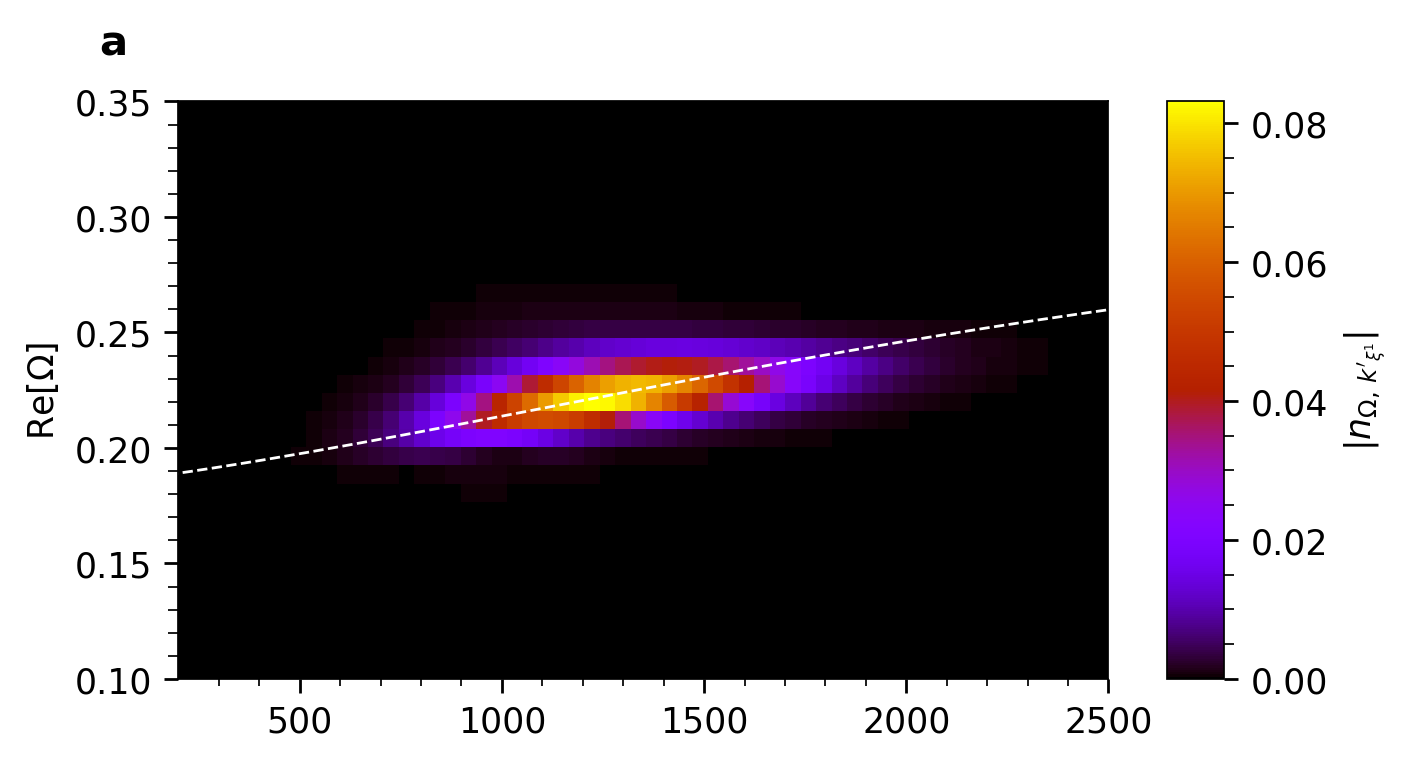

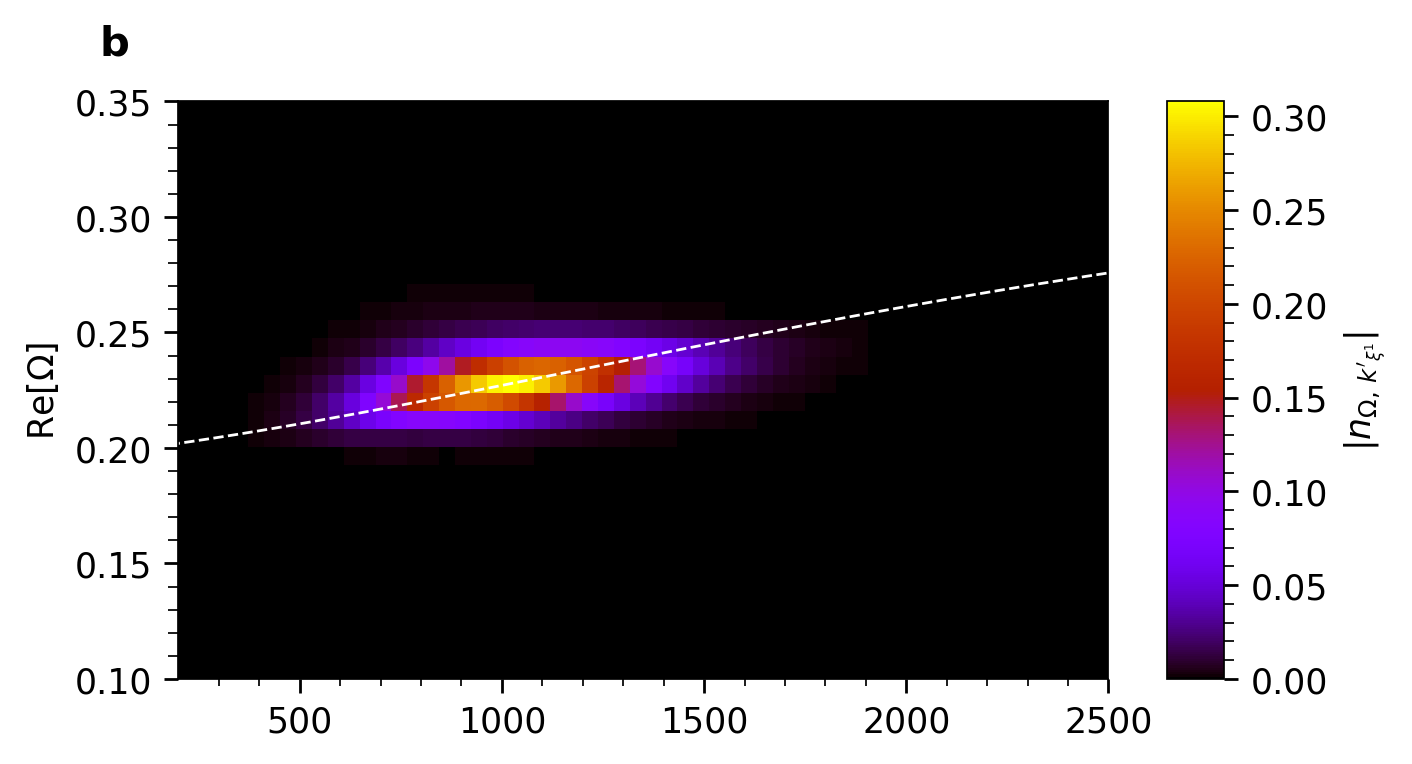

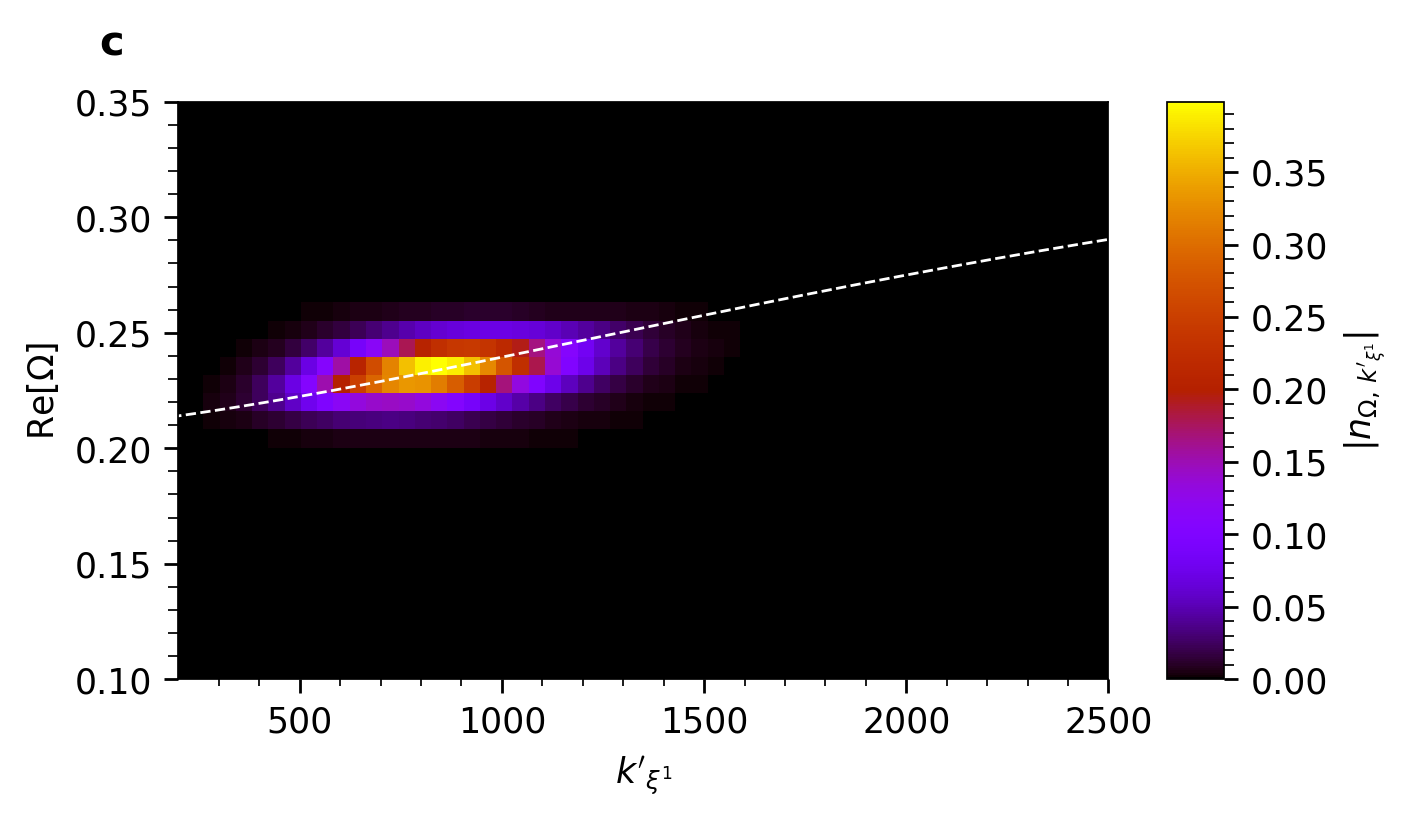

In [10]:
dpi = 250
fig, ax= plt.subplots(figsize=(6,3), dpi=dpi)
quad = ax.pcolormesh(kx_shift/ h1_1,omega_shift,abs(dns_wxt_shift[:,:,0]), shading="nearest" ,cmap="gnuplot") # ,cmap="jet")
cbar = fig.colorbar(quad, shrink=1.0, aspect=10.0)
cbar.set_label("$|n_{\Omega,\,k'_{\\xi^1}}|$")
ax.plot(dsk981,dsfr981 , linestyle="dashed", color= "white" ,linewidth=.8)
ax.set_ylabel("$\mathrm{Re}[\Omega]$")
ax.set_ylim(0.1,0.35)
ax.set_xlim(200,2500)
ax.text(5, 0.37, "a", fontfamily="sans-serif", fontweight="bold", fontsize=12)
plt.savefig("../fig3-6/fig_sub/fft1.png", bbox_inches='tight')
plt.show()


fig, ax= plt.subplots(figsize=(6,3), dpi=dpi)
quad = ax.pcolormesh(kx_shift/h1_2,omega_shift,abs(dns_wxt_shift[:,:,1]), shading="nearest" ,cmap="gnuplot")
cbar = fig.colorbar(quad, shrink=1.0, aspect=10.0)
cbar.set_label("$|n_{\Omega,\,k'_{\\xi^1}}|$")
ax.plot(dsk916,dsfr916 , linestyle="dashed", color= "white" ,linewidth=.8)
ax.set_ylabel("$\mathrm{Re}[\Omega]$")
ax.set_ylim(0.1,0.35)
ax.set_xlim(200,2500)
ax.text(5, 0.37, "b", fontfamily="sans-serif", fontweight="bold", fontsize=12)
plt.savefig("../fig3-6/fig_sub/fft2.png", bbox_inches='tight')
plt.show()

fig, ax= plt.subplots(figsize=(6,3), dpi=dpi)
quad = ax.pcolormesh(kx_shift/h1_3,omega_shift,abs(dns_wxt_shift[:,:,2]), shading="nearest",cmap="gnuplot") 
cbar = fig.colorbar(quad, shrink=1.0, aspect=10.0, format="%0.2f")
cbar.set_label("$|n_{\Omega,\,k'_{\\xi^1}}|$")
ax.plot(dsk863,dsfr863 , linestyle="dashed", color= "white",linewidth=.8)
ax.set_xlabel("$k'_{\\xi^1}$")
ax.set_ylabel("$\mathrm{Re}[\Omega]$")
ax.set_ylim(0.1,0.35)
ax.set_xlim(200,2500)
ax.text(5, 0.37, "c", fontfamily="sans-serif", fontweight="bold", fontsize=12)
plt.savefig("../fig3-6/fig_sub/fft3.png", bbox_inches='tight')
plt.show()

In [12]:
import cv2

im1 = cv2.imread('../fig3-6/fig_sub/fft1.png')
im2 = cv2.imread('../fig3-6/fig_sub/fft2.png')
im3 = cv2.imread('../fig3-6/fig_sub/fft3.png')
im_v = cv2.vconcat([im1, im2])
cv2.imwrite('../fig3-6/fig_sub/fft12.png', im_v)


im12 = cv2.imread('../fig3-6/fig_sub/fft12.png')
im_v2 = cv2.vconcat([im12, im3])
cv2.imwrite('../fig3-6/fig5.png', im_v2)

True